INSTALLING REQURIED PACKAGES

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
! pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

  Cloning git://github.com/Theano/Theano.git to /tmp/pip-req-build-tfx6vmn9
  Running command git clone -q git://github.com/Theano/Theano.git /tmp/pip-req-build-tfx6vmn9
  Created wheel for Theano: filename=Theano-1.0.4+51.gf1e4ec47c-cp36-none-any.whl size=2667983 sha256=a6f7d6f22af87f1d4e7449be804e063361a213ab4dfeda71c3bd05261f5097d4
  Stored in directory: /tmp/pip-ephem-wheel-cache-4114thf4/wheels/ae/32/7c/62beb8371953eb20c271b3bac7d0e56e1a2020d46994346b52
Successfully built Theano
  Found existing installation: Theano 1.0.4
    Uninstalling Theano-1.0.4:
      Successfully uninstalled Theano-1.0.4


INSTALL TENSOR FLOW

In [0]:
!pip install tensorflow

INSTALL AND UPGRADE KERAS

In [0]:
!pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)


DISPLAY DATASET IN GREY SCALE IMAGES TO SHOW DIFFERENCE BETWEEN FRESH WATER AND WASTE WATER

In [0]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image 

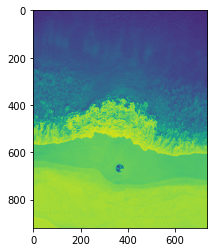

In [0]:
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img=Image.open('/content/drive/My Drive/dataset water/fresh water/01cf2b914a5d8d34ef1046325f7fa9a3.jpg').convert('L')
img.save('/content/drive/My Drive/dataset water/fresh water/01cf2b914a5d8d34ef1046325f7fa9a3.jpg')
im=mpimg.imread('/content/drive/My Drive/dataset water/fresh water/01cf2b914a5d8d34ef1046325f7fa9a3.jpg')
a=plt.imshow(im)
plt.show(a)

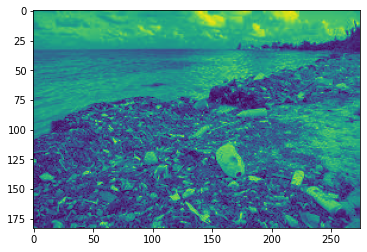

In [0]:
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img=Image.open('/content/drive/My Drive/dataset water/waste water/download (11).jpg').convert('L')
img.save('/content/drive/My Drive/dataset water/waste water/download (11).jpg')
im=mpimg.imread('/content/drive/My Drive/dataset water/waste water/download (11).jpg')
a=plt.imshow(im)
plt.show(a)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


PREPROCESSING

In [0]:
classifier = Sequential()

In [0]:
classifier.add(Conv2D(32, (3, 3), input_shape = (300, 300, 3), activation = 'relu'))

In [0]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [0]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [0]:
classifier.add(Flatten())

In [0]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [0]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

SPLITTING DATA INTO TRAINING AND TESTING

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(validation_split=0.3, rescale=1./255)

train_generator=datagen.flow_from_directory('/content/drive/My Drive/dataset water', subset='training')
value_generator=datagen.flow_from_directory('/content/drive/My Drive/dataset water', subset='validation')

Found 1263 images belonging to 2 classes.
Found 541 images belonging to 2 classes.


TRAINING THE MODEL


In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(validation_split=0.3, 
                             rescale=1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True)

train_generator=datagen.flow_from_directory('/content/drive/My Drive/dataset water',
                                            subset='training', 
                                            target_size = (300, 300),
                                            batch_size = 32,
                                            class_mode = 'binary')

value_generator=datagen.flow_from_directory('/content/drive/My Drive/dataset water', 
                                            subset='validation', 
                                            target_size = (300, 300),
                                            batch_size = 32,
                                            class_mode = 'binary')


classifier.fit_generator(train_generator,
                         steps_per_epoch =25,
                         epochs = 10)




Found 1263 images belonging to 2 classes.
Found 541 images belonging to 2 classes.
Epoch 1/10
25/25 [==============================] - 213s 9s/step - loss: 1.3567 - accuracy: 0.8914
Epoch 2/10
25/25 [==============================] - 155s 6s/step - loss: 0.2620 - accuracy: 0.9075
Epoch 3/10
25/25 [==============================] - 89s 4s/step - loss: 0.2515 - accuracy: 0.9208
Epoch 4/10
25/25 [==============================] - 97s 4s/step - loss: 0.1887 - accuracy: 0.9413
Epoch 5/10
25/25 [==============================] - 83s 3s/step - loss: 0.1973 - accuracy: 0.9360
Epoch 6/10
25/25 [==============================] - 97s 4s/step - loss: 0.1946 - accuracy: 0.9337
Epoch 7/10
25/25 [==============================] - 93s 4s/step - loss: 0.2182 - accuracy: 0.9400
Epoch 8/10
25/25 [==============================] - 86s 3s/step - loss: 0.1381 - accuracy: 0.9575
Epoch 9/10
25/25 [==============================] - 98s 4s/step - loss: 0.1740 - accuracy: 0.9515
Epoch 10/10
25/25 [==============

SAVE THE MODEL

In [0]:
classifier.save('/content/drive/My Drive/classifier_waste_detections.h5')

In [0]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/dataset water/fresh water/012d70102ba9e1b0db8af85f9670c8c2.jpg', target_size = (300, 300))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
   print('WASTE CONTENT DETECTED' ) 
else:
  print( 'WASTE CONTENT NULL')

FileNotFoundError: ignored